In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

## 5.1 pandas 자료구조 소개

### 5.1.1 Series

In [2]:
obj = Series([4,7,-5,3])
obj
obj.values
obj.index
obj.dtype

0    4
1    7
2   -5
3    3
dtype: int64

array([ 4,  7, -5,  3], dtype=int64)

RangeIndex(start=0, stop=4, step=1)

dtype('int64')

In [3]:
#인덱스 지정하여 생성
obj2 = Series([4,7,-5,3],index = ['d','b','a','c'])
obj2
obj2['a']
obj2[0]

d    4
b    7
a   -5
c    3
dtype: int64

-5

4

In [4]:
obj2[['a','b']]
obj2['a'] = 100
obj2

a   -5
b    7
dtype: int64

d      4
b      7
a    100
c      3
dtype: int64

In [5]:
#불리언 연산을 해도 색인-값이 연결되어있음
obj2[obj2>2]
#수학연산을 해도 연결되어있음
obj2 **2

d      4
b      7
a    100
c      3
dtype: int64

d       16
b       49
a    10000
c        9
dtype: int64

In [6]:
#크기가 고정되고 정렬된 사전형이라 생각하면됨, 사전형을 대체하여 사용가능
'a' in obj2
'k' in obj2
7 in obj2.values

#사전형으로 부터 Series 생성도 가능함, 키값은 순서대로 들어가고 순서를 지정해줄수도 있음
sdata = {
    'Ohio':35000,
    'Texas':71000,
    'Oregon':16000,
    'Utah':5000
}
obj3 = Series(sdata)
obj3
state = ['California','Utah','Ohio']
obj4 = Series(sdata,index=state)
obj4

True

False

True

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

California        NaN
Utah           5000.0
Ohio          35000.0
dtype: float64

In [7]:
#isnull, notnull
obj4
obj4.isnull()
obj4.notnull()

California        NaN
Utah           5000.0
Ohio          35000.0
dtype: float64

California     True
Utah          False
Ohio          False
dtype: bool

California    False
Utah           True
Ohio           True
dtype: bool

- Series의 유용한 기능은 산술연산에서 색인과 라벨로 자동정렬하는것

In [8]:
obj3
obj4
obj3+obj4

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

California        NaN
Utah           5000.0
Ohio          35000.0
dtype: float64

California        NaN
Ohio          70000.0
Oregon            NaN
Texas             NaN
Utah          10000.0
dtype: float64

In [9]:
#Series 객체와 색인은 모두 name속성이 있음
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Utah           5000.0
Ohio          35000.0
Name: population, dtype: float64

In [10]:
#색인은 대입해서 변경이 가능함
obj
obj.index=['a','k','c','e']
obj
obj.index = np.arange(len(obj))
obj

0    4
1    7
2   -5
3    3
dtype: int64

a    4
k    7
c   -5
e    3
dtype: int64

0    4
1    7
2   -5
3    3
dtype: int64

### 5.1.2 DataFrame  
색인의 모양이 같은 Series를 담고있는 사전이라 생각하면 편함

In [11]:
data = {
    'state':['Ohio','Ohio','Ohio','Nevada','Nevada','Nevada'],
    'year':[2000,2001,2002,2001,2002,2003],
    'pop':[1.5,1.7,3.6,2.4,2.9,3.2]
}

frame = DataFrame(data)
frame
#frame.set_index('state')
#frame.reset_index()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [12]:
#순서를 지정할수 있음
DataFrame(data,columns = ['pop','state','year'])

,pop,state,year
0,1.5,Ohio,2000
1,1.7,Ohio,2001
2,3.6,Ohio,2002
3,2.4,Nevada,2001
4,2.9,Nevada,2002
5,3.2,Nevada,2003


In [13]:
frame2 = DataFrame(data,columns = ['pop','state','year','nono'],
                  index=['one','two','three','four','five','six'])
frame2

,pop,state,year,nono
one,1.5,Ohio,2000,NaN
two,1.7,Ohio,2001,NaN
three,3.6,Ohio,2002,NaN
four,2.4,Nevada,2001,NaN
five,2.9,Nevada,2002,NaN
six,3.2,Nevada,2003,NaN


In [14]:
#컬렁믄 사전처럼 접근도 가능하고 속성으로 접근도 가능함
frame2['pop']
frame2.nono

#반환되는 Series에는 Name속성이 알맞게 채워짐

one      1.5
two      1.7
three    3.6
four     2.4
five     2.9
six      3.2
Name: pop, dtype: float64

one      NaN
two      NaN
three    NaN
four     NaN
five     NaN
six      NaN
Name: nono, dtype: object

In [15]:
#row에 접근하려면 loc 를 이용
frame2.loc['one']
frame2.loc[['one','three']]
frame2.loc['one','pop']

pop       1.5
state    Ohio
year     2000
nono      NaN
Name: one, dtype: object

,pop,state,year,nono
one,1.5,Ohio,2000,NaN
three,3.6,Ohio,2002,NaN


1.5

In [16]:
# 컬럼에는 대입이 가능함
frame2['nono'] = 2
frame2
frame2['nono'] = [1,2,3,4,5,6]#np.arange(len(frame2))
frame2
# 리스트나 배열을 대입할때는 크기가 동일해야함

# Series를 대입하면 index따라 대입되고, 결측은 Nan
a = Series([1,2,3],index=['one','three','Nine'])
frame2['nono'] = a
frame2

,pop,state,year,nono
one,1.5,Ohio,2000,2
two,1.7,Ohio,2001,2
three,3.6,Ohio,2002,2
four,2.4,Nevada,2001,2
five,2.9,Nevada,2002,2
six,3.2,Nevada,2003,2


,pop,state,year,nono
one,1.5,Ohio,2000,1
two,1.7,Ohio,2001,2
three,3.6,Ohio,2002,3
four,2.4,Nevada,2001,4
five,2.9,Nevada,2002,5
six,3.2,Nevada,2003,6


,pop,state,year,nono
one,1.5,Ohio,2000,1.0
two,1.7,Ohio,2001,NaN
three,3.6,Ohio,2002,2.0
four,2.4,Nevada,2001,NaN
five,2.9,Nevada,2002,NaN
six,3.2,Nevada,2003,NaN


del 예약어를 사용해 컬럼 삭제가능

In [17]:
frame2['eastern'] = frame2['state']=='Ohio'
frame2
del frame2['eastern']
frame2

,pop,state,year,nono,eastern
one,1.5,Ohio,2000,1.0,True
two,1.7,Ohio,2001,NaN,True
three,3.6,Ohio,2002,2.0,True
four,2.4,Nevada,2001,NaN,False
five,2.9,Nevada,2002,NaN,False
six,3.2,Nevada,2003,NaN,False


,pop,state,year,nono
one,1.5,Ohio,2000,1.0
two,1.7,Ohio,2001,NaN
three,3.6,Ohio,2002,2.0
four,2.4,Nevada,2001,NaN
five,2.9,Nevada,2002,NaN
six,3.2,Nevada,2003,NaN


**색인을 통해 얻은 컬럼은 데이터에 대한 뷰이므로 변경시 원본도 변경되는것에 주의, 복사하려면 Series의 copy 명령어 사용**

In [18]:
#중첩된 사전으로부터 DataFrame 생성
data = {
    'Nevada':{2001:2.4,2002:2.9},
    'Ohio':{2000:1.5,2001:1.7,2002:3.6}
}
frame3 = DataFrame(data)
frame3
DataFrame(data,columns = ['Ohio'])
DataFrame(data,index = [2001,2002,2003])

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


,Ohio
2000,1.5
2001,1.7
2002,3.6


,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [19]:
#전치 가능
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


In [20]:
#색인과 컬럼의 이름도 지정가능함
frame3.index.name = 'year';frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [21]:
#values 속성은 데이터 전체를 2차원으로 반환
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

### 5.1.3 색인객체

In [22]:
obj = pd.Series(range(3),index=['a','b','c'])
index = obj.index
index
index[:2]

Index(['a', 'b', 'c'], dtype='object')

Index(['a', 'b'], dtype='object')

In [23]:
#색인 객체는 요소를 바꿀수 없으므로 자료구조사이에서 안전하게 공유할수 있다.
labels = pd.Index(np.arange(3))
labels
obj2 = pd.Series([1.5,-2.5,0],index = labels)
obj2
obj2.index is labels
obj2.index = [0,1,2]
obj2
obj2.index is labels

Int64Index([0, 1, 2], dtype='int64')

0    1.5
1   -2.5
2    0.0
dtype: float64

True

0    1.5
1   -2.5
2    0.0
dtype: float64

False

## 5.2 핵심기능

### 5.2.1 재색인

In [24]:
obj = pd.Series([4.5,7.2,-5.3,3.6],index = ['d','b','a','c'])
#reindex를 하면 새로운 색인에 맞게 재배열하고, 색인이 없으면 Nan 추가
obj
obj2 = obj.reindex(['a','b','c','d','e'])
obj
obj2


d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [25]:
#시계열 데이터 같은경우 재색인 할때 값을 보간하거나 채워넣어야할 경우가 있음
obj3 = pd.Series(['blue','purple','yellow'],index=[0,2,4])
obj3.reindex(range(6))
obj3.reindex(range(6),method='ffill')

0      blue
1       NaN
2    purple
3       NaN
4    yellow
5       NaN
dtype: object

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [26]:
#DF에서는 색인,컬럼 둘다 변경가능하고 그냥 순서만 넣으면 색인기준으로 재색인
frame = pd.DataFrame(np.arange(9).reshape((3,3)),index = ['a','c','d'],columns=['Ohio','Texas','California'])
frame
frame.reindex(['a','b','c','d'])

#columns 예약어를 이용해 열도 재색인 가능
frame.reindex(columns=['Texas','Utah','California'])

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [27]:
#loc 이용하면 명시적으로 간결하게 재색인가능
frame.loc[['a','b','c','d'],['Texas','Utah','California']]

C:\Users\sorkt\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


### 5.2.2 하나의 로우나 컬럼 삭제하기  
 drop 메서드 이용

In [28]:
obj = Series(np.arange(5.),index = ['a','b','c','d','e'])
obj
new_obj = obj.drop(['c'])
new_obj
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [29]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),
                    index = ['가','나','다','라'],
                    columns = ['A','B','C','D'])
data
#기본적으로 row 날리고 Column 날리려면 axis = 1 or axis ='columns'
data.drop(['가','가','다'])
data.drop(['A','B'],axis=1)

,A,B,C,D
가,0,1,2,3
나,4,5,6,7
다,8,9,10,11
라,12,13,14,15


,A,B,C,D
나,4,5,6,7
라,12,13,14,15


,C,D
가,2,3
나,6,7
다,10,11
라,14,15


In [30]:
a = data.drop('가')
a['A']=[0,0,0]
a
data

,A,B,C,D
나,0,5,6,7
다,0,9,10,11
라,0,13,14,15


,A,B,C,D
가,0,1,2,3
나,4,5,6,7
다,8,9,10,11
라,12,13,14,15


### 5.2.3 색인하기, 선택하기, 거르기

In [31]:
obj = pd.Series(np.arange(4.),index= ['a','b','c','d'])
obj;obj['a'];obj[1:3];obj[['a','b','d']]

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

0.0

b    1.0
c    2.0
dtype: float64

a    0.0
b    1.0
d    3.0
dtype: float64

In [32]:
obj['a':'c'] #라벨 이름으로 슬라이싱하면 끝점을 포함함다.
obj[0:-1]

a    0.0
b    1.0
c    2.0
dtype: float64

a    0.0
b    1.0
c    2.0
dtype: float64

데이터 프래임의 슬라이싱에서는 ['a'] 같이하면 컬럼이, 슬라이싱이나 불린배열사용하면 로우가 선택됨

In [33]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),index = ['가','나','다','라'],
                   columns = ['a','b','c','d'])
data
data['a']
data[['a','b']]
data[1:3]
data[[True,False,True,False]]

,a,b,c,d
가,0,1,2,3
나,4,5,6,7
다,8,9,10,11
라,12,13,14,15


가     0
나     4
다     8
라    12
Name: a, dtype: int32

,a,b
가,0,1
나,4,5
다,8,9
라,12,13


,a,b,c,d
나,4,5,6,7
다,8,9,10,11


,a,b,c,d
가,0,1,2,3
다,8,9,10,11


- **loc와 iloc로 선택하기**

In [34]:
data.loc['가']
data.loc['가':'나',['a','c']]

a    0
b    1
c    2
d    3
Name: 가, dtype: int32

,a,c
가,0,2
나,4,6


### 5.2.4 정수 색인  
정수색인과 라벨색인이 모호할 경우, 먼저 라벨을 찾아보고 없으면 정수색인을 함  
좀더 세밀하게 사용하기위해 loc,iloc 구분해서 사용하자

In [35]:
ser = pd.Series(np.arange(3.))
ser
#ser[-1]
ser.iloc[-1]

0    0.0
1    1.0
2    2.0
dtype: float64

2.0

### 5.2.5 산술연산과 데이터 정렬  
다른색인을 가진 객체끼리 더하면 결과에 두 색인이 통합됨, DB의 외부 join과 유사함

In [36]:
s1 = pd.Series([7.3,-2.5,3.4,1.5],index = ['a','c','d','e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1],index = ['a','c','e','f','g'])
s1+s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [37]:
#DataFrame에서도 동일하게 NaN이지만 컬럼,로우 둘다해당함
df1 = pd.DataFrame(np.arange(9.).reshape((3,3)), index = ['서울','대구','부산'],
                  columns =list('bcd'))
df2 = pd.DataFrame(np.arange(12.).reshape((4,3)), index = ['서울','대전','부산','강릉'],
                  columns =list('acf'))
df1;df2
df1 + df2

,b,c,d
서울,0.0,1.0,2.0
대구,3.0,4.0,5.0
부산,6.0,7.0,8.0


,a,c,f
서울,0.0,1.0,2.0
대전,3.0,4.0,5.0
부산,6.0,7.0,8.0
강릉,9.0,10.0,11.0


,a,b,c,d,f
강릉,NaN,NaN,NaN,NaN,NaN
대구,NaN,NaN,NaN,NaN,NaN
대전,NaN,NaN,NaN,NaN,NaN
부산,NaN,NaN,14.0,NaN,NaN
서울,NaN,NaN,2.0,NaN,NaN


산술 연산 메소드에 채워넣을 값 지정하기  
---  


In [38]:
df1 = pd.DataFrame(np.arange(12.).reshape((3,4)),
                  columns = list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4,5)),
                  columns = list('abcde'))
df2.loc[1,'b'] = np.nan
df1
df2
df1 + df2

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,NaN,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [39]:
#산술 연산 메소드에 인자로 fill_value 지정해서 사용가능
df1.add(df2,fill_value=0) #결과를 완전히 0으로 바꾸는게 아니라 더하는 값이 Nan이면 걔만 0으로 바꾸는듯

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [40]:
#reindex에도 사용가능함
df1.reindex(columns = df2.columns,fill_value = 0)

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


In [41]:
#산술 연산 메소드에는 r이 붙은, 짝궁이 있음, 인자를 뒤집어 계산함
1/df1
df1.div(1)
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


DataFrame과 Series간의 연산  
---

In [42]:
arr = np.arange(12.).reshape((3,4))
arr
arr[0]
arr - arr[0] #브로드 캐스팅

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

array([0., 1., 2., 3.])

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [43]:
#DataFrame와 Series도 위와 유사함
frame = pd.DataFrame(np.arange(12).reshape((4,3)),
                    columns = list('bdc'),
                    index = ['Utah','Ohio','Texas','Oregon'])
series = frame.iloc[0]
frame;series

,b,d,c
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


b    0
d    1
c    2
Name: Utah, dtype: int32

In [44]:
#Df와 Series간의 연산은 series의 색인을 df의 column에 맞추고 아래로 전파
frame - series

,b,d,c
Utah,0,0,0
Ohio,3,3,3
Texas,6,6,6
Oregon,9,9,9


In [45]:
#인덱스가 안맞으면 그객체는 알맞게 재색인됨
series2 = pd.Series(np.arange(3),index=['b','e','f'])
frame
series2
frame - series2

,b,d,c
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


b    0
e    1
f    2
dtype: int32

,b,c,d,e,f
Utah,0.0,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,NaN,NaN,NaN
Texas,6.0,NaN,NaN,NaN,NaN
Oregon,9.0,NaN,NaN,NaN,NaN


In [46]:
#각 로우에 대해 연산하고 싶으면 산술메서드 사용하면됨
series3 = frame['d']
frame
series3
frame.sub(series3,axis = 0)

,b,d,c
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


Utah       1
Ohio       4
Texas      7
Oregon    10
Name: d, dtype: int32

,b,d,c
Utah,-1,0,1
Ohio,-1,0,1
Texas,-1,0,1
Oregon,-1,0,1


### 5.2.6 함수적용과 매핑  
pandas에도 ufunc 적용가능함

In [47]:
frame = pd.DataFrame(np.random.randn(12).reshape(4,3),
                    index= ['Utah','Ohio','Texas','Oregon'],
                    columns = list('bde'))
frame

,b,d,e
Utah,-0.272592,-0.555355,-1.686432
Ohio,0.620568,1.298101,-1.723348
Texas,-0.332617,0.536737,0.039468
Oregon,-1.143410,-0.928708,-1.723010


In [48]:
np.abs(frame)

,b,d,e
Utah,0.272592,0.555355,1.686432
Ohio,0.620568,1.298101,1.723348
Texas,0.332617,0.536737,0.039468
Oregon,1.143410,0.928708,1.723010


apply 메소드를 이용하면 각 행,열에 연산 적용가능  
---

In [49]:
f = lambda x:x.max()-x.min()
frame.apply(f,axis = 0)
frame.apply(f,axis = 1)
frame.apply(f)

b    1.763977
d    2.226809
e    1.762815
dtype: float64

Utah      1.413840
Ohio      3.021449
Texas     0.869354
Oregon    0.794302
dtype: float64

b    1.763977
d    2.226809
e    1.762815
dtype: float64

꼭 스칼라 값 뿐 아니라 여러값을 가질수도 있음  
---

In [50]:
def f(x):
    return pd.Series([x.min(),x.max()],index=['min','max'])
frame.apply(f,axis=1)

,min,max
Utah,-1.686432,-0.272592
Ohio,-1.723348,1.298101
Texas,-0.332617,0.536737
Oregon,-1.723010,-0.928708


각각의 원소에 적용하고 싶다면 applymap 사용  
---

In [51]:
f = lambda x:'{0:.2f}'.format(x)
frame.applymap(f)

,b,d,e
Utah,-0.27,-0.56,-1.69
Ohio,0.62,1.30,-1.72
Texas,-0.33,0.54,0.04
Oregon,-1.14,-0.93,-1.72


In [52]:
#Series의 경우에는 map이 있음
frame['d'].map(f)

Utah      -0.56
Ohio       1.30
Texas      0.54
Oregon    -0.93
Name: d, dtype: object

### 5.2.7 정렬과 순위  
sort_index 메소드 이용해서 정렬  

In [53]:
obj = pd.Series(range(4),index=['d','a','b','c'])
obj
obj.sort_index()
#정렬후 새객체 반환
obj

d    0
a    1
b    2
c    3
dtype: int64

a    1
b    2
c    3
d    0
dtype: int64

d    0
a    1
b    2
c    3
dtype: int64

In [54]:
frame = pd.DataFrame(np.arange(8).reshape([2,4]),
                    index = ['two','one'],
                    columns = ['d','a','b','c'])
frame
frame.sort_index(axis=1)
frame.sort_index(axis=0)

,d,a,b,c
two,0,1,2,3
one,4,5,6,7


,a,b,c,d
two,1,2,3,0
one,5,6,7,4


,d,a,b,c
one,4,5,6,7
two,0,1,2,3


In [55]:
#내림차순
frame.sort_index(axis=1,ascending=False)

,d,c,b,a
two,0,3,2,1
one,4,7,6,5


값에 따라 정렬할때는 sort_values  
---

In [56]:
series = pd.Series([4,-1,7,np.nan])
series
series.sort_values()
frame = pd.DataFrame({
    'b':[7,7,-3,2],
    'a':[0,1,0,1]
})
frame

0    4.0
1   -1.0
2    7.0
3    NaN
dtype: float64

1   -1.0
0    4.0
2    7.0
3    NaN
dtype: float64

,b,a
0,7,0
1,7,1
2,-3,0
3,2,1


In [57]:
#정렬할 열의 이름을 넣어주어야함
frame
frame.sort_values(by ='a')
frame.sort_values(by =['a','b'])

,b,a
0,7,0
1,7,1
2,-3,0
3,2,1


,b,a
0,7,0
2,-3,0
1,7,1
3,2,1


,b,a
2,-3,0
0,7,0
3,2,1
1,7,1


순위는 정렬과 흡사하지만 순위를 return하고, 동점인 경우 기본적으로 평균을 매김

### 5.2.8 중복색인

In [58]:
obj = pd.Series(range(5),index=['a','a','b','b','c'])
obj
#is_unique는 색인이 유일한 값인지 알려줌
obj.index.is_unique
obj.index.unique()

a    0
a    1
b    2
b    3
c    4
dtype: int64

False

Index(['a', 'b', 'c'], dtype='object')

In [59]:
#색인이 중복되는 경우 색인을 이용해 접근시 스칼라가 아닌 Series를 돌려줌
obj['c']
obj['a']

4

a    0
a    1
dtype: int64

## 5.3 기술 통계 계산과 요약  
대부분 하나의 열이나 행에서 단일값을 구하는 축소, 요약통계의 범주에 속함  
np와 다른점은 NaN을 제외하도록 설계된점

In [60]:
df = pd.DataFrame([[1.4,np.nan],[7.1,-4.5],[np.nan,np.nan],[0.75,-1.3]],
                 index = ['a','b','c','d'],
                 columns=['one','two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [61]:
df.sum()
df.sum(skipna=False)

one    9.25
two   -5.80
dtype: float64

one   NaN
two   NaN
dtype: float64

In [62]:
df = pd.DataFrame([[1.4,np.nan],[7.1,-4.5],[np.nan,np.nan],[0.75,-1.3]],
                 index = ['a','b','c','d'],
                 columns=['one','two'])
#idxmin, idxmax 메서드는 최소,최대값을 가진 색인값 등 간접통계 반환
df.idxmin()

#누산
df.cumsum(axis=0)

#한번에 여러개값의 통계결과를 얻는 describe
df.describe()

print('수치데이터가 아닐경우 다른 결과를 dp함')
obj = pd.Series(['a','b','a','c']*4)
obj.describe()


one    d
two    b
dtype: object

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


수치데이터가 아닐경우 다른 결과를 dp함


count     16
unique     3
top        a
freq       8
dtype: object

### 5.3.1 상관관계와 공분산  
- 두쌍의 인자를 필요로함  
pandas-datareader 필요  
conda install pandas-datareader

In [63]:
import pandas_datareader.data as web
import os
# if 'webdata.npz' not in os.listdir():

#     all_data = {
#         ticker:web.get_data_yahoo(ticker)
#         for ticker in ['AAPL','IBM','MSFT','GOOG']
#     }
#     np.savez('webdata.npz',all_data)
#     print('데이터 저장!!')
# else:
#     print('불러오기 완료')
#     all_data = np.load('webdata.npz')

#일단 스킵하자
all_data = {
    ticker:web.get_data_yahoo(ticker)
    for ticker in ['AAPL','IBM','MSFT','GOOG']
}

In [64]:
price = pd.DataFrame({ticker:data['Adj Close'] for ticker,data in all_data.items() })
volume = pd.DataFrame({ticker:data['Volume'] for ticker,data in all_data.items()})

In [65]:
price.head()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2009-12-31,26.272409,96.994438,24.072418,308.832428
2010-01-04,26.681330,98.142967,24.443624,312.204773
2010-01-05,26.727465,96.957375,24.451517,310.829926
2010-01-06,26.302330,96.327530,24.301458,302.994293
2010-01-07,26.253704,95.994110,24.048725,295.940735


In [66]:
returns = price.pct_change()
returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2019-08-08,0.022056,0.018983,0.026685,0.026244
2019-08-09,-0.008240,-0.028337,-0.008496,-0.013936
2019-08-12,-0.002537,-0.014765,-0.013942,-0.011195
2019-08-13,0.042348,0.012452,0.020694,0.019205
2019-08-14,-0.029765,-0.033434,-0.030114,-0.027546


C:\Users\sorkt\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


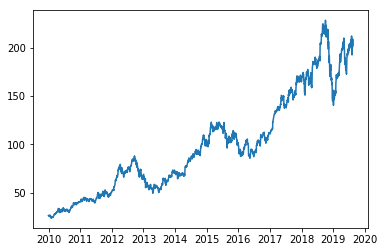

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(price['AAPL'])